In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from artemis.interactions_methods.model_agnostic import GreenwellMethod
from artemis.interactions_methods.model_agnostic import SejongOhMethod
from artemis.utilities.domain import VisualisationType

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = RandomForestRegressor().fit(X, y)

In [3]:
vint = GreenwellMethod()
vint.fit(model, X, 15, show_progress=True)  # all features - GreenwellVariableInteraction

Calculating variable importance: 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]


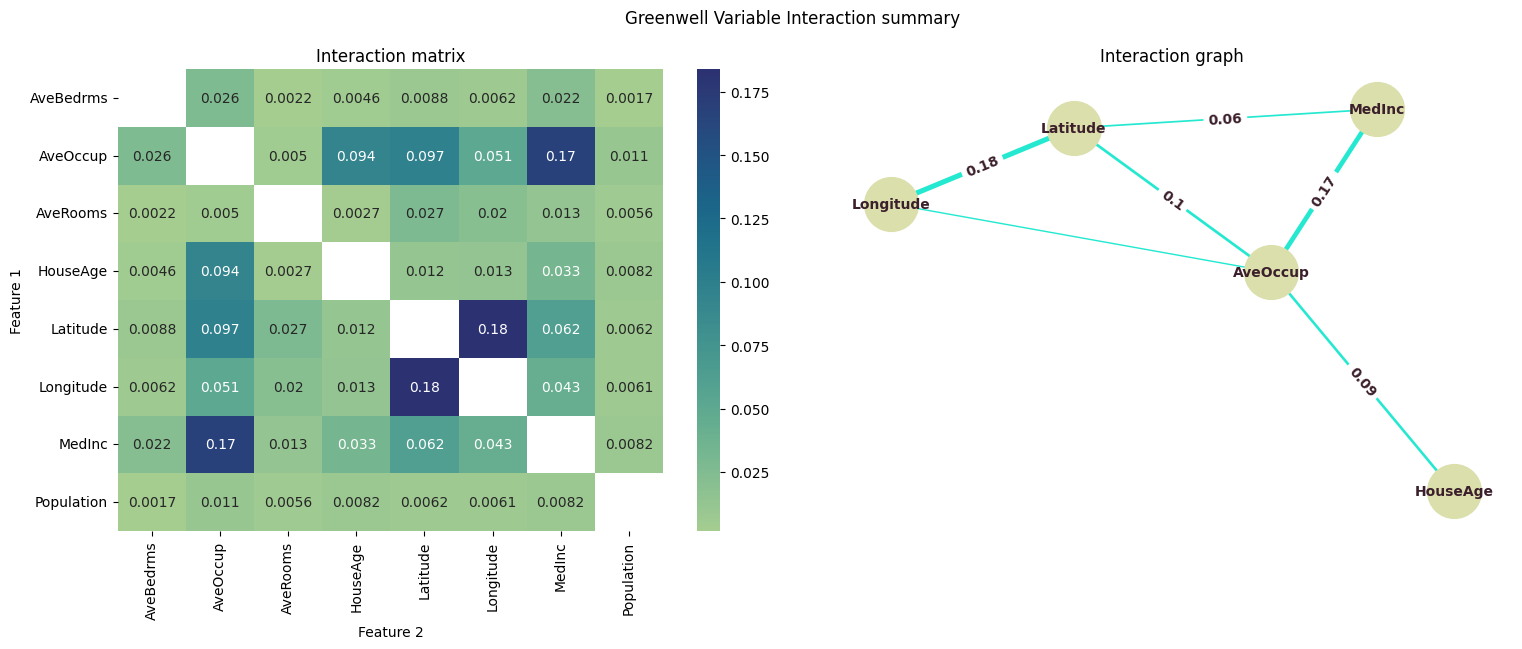

In [4]:
vint.plot()  # summary - GreenwellVariableInteraction

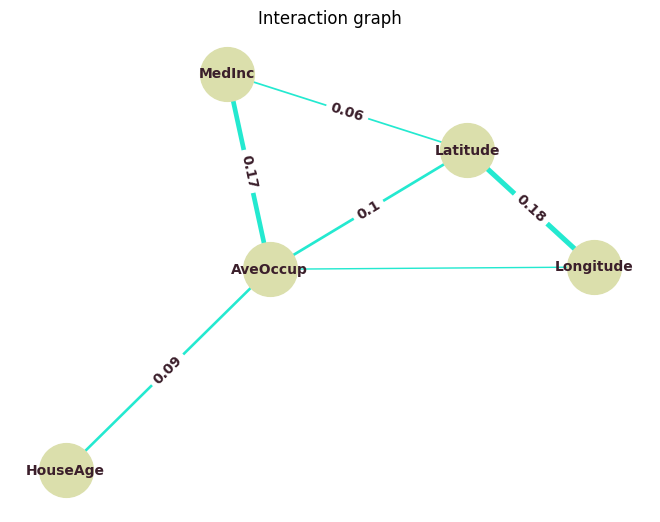

In [5]:
vint.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - GreenwellVariableInteraction

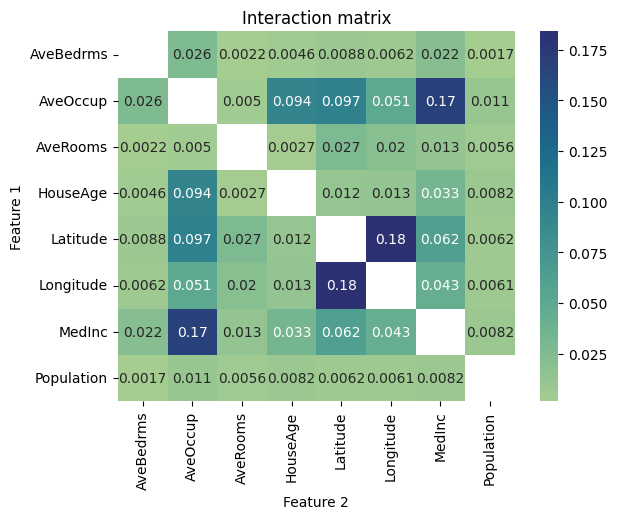

In [6]:
vint.plot(VisualisationType.HEATMAP)  # heatmap - GreenwellVariableInteraction

In [7]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features - GreenwellVariableInteraction

Calculating variable importance: 100%|██████████| 3/3 [00:00<00:00, 20.94it/s]


In [8]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 50, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all profile: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]


In [9]:
print(h_stat.variable_importance)

      Feature  Partial dependence based
0      MedInc                  0.703115
1    Latitude                  0.424689
2    AveOccup                  0.311005
3    AveRooms                  0.076590
4    HouseAge                  0.044187
5   AveBedrms                  0.042533
6  Population                  0.010703


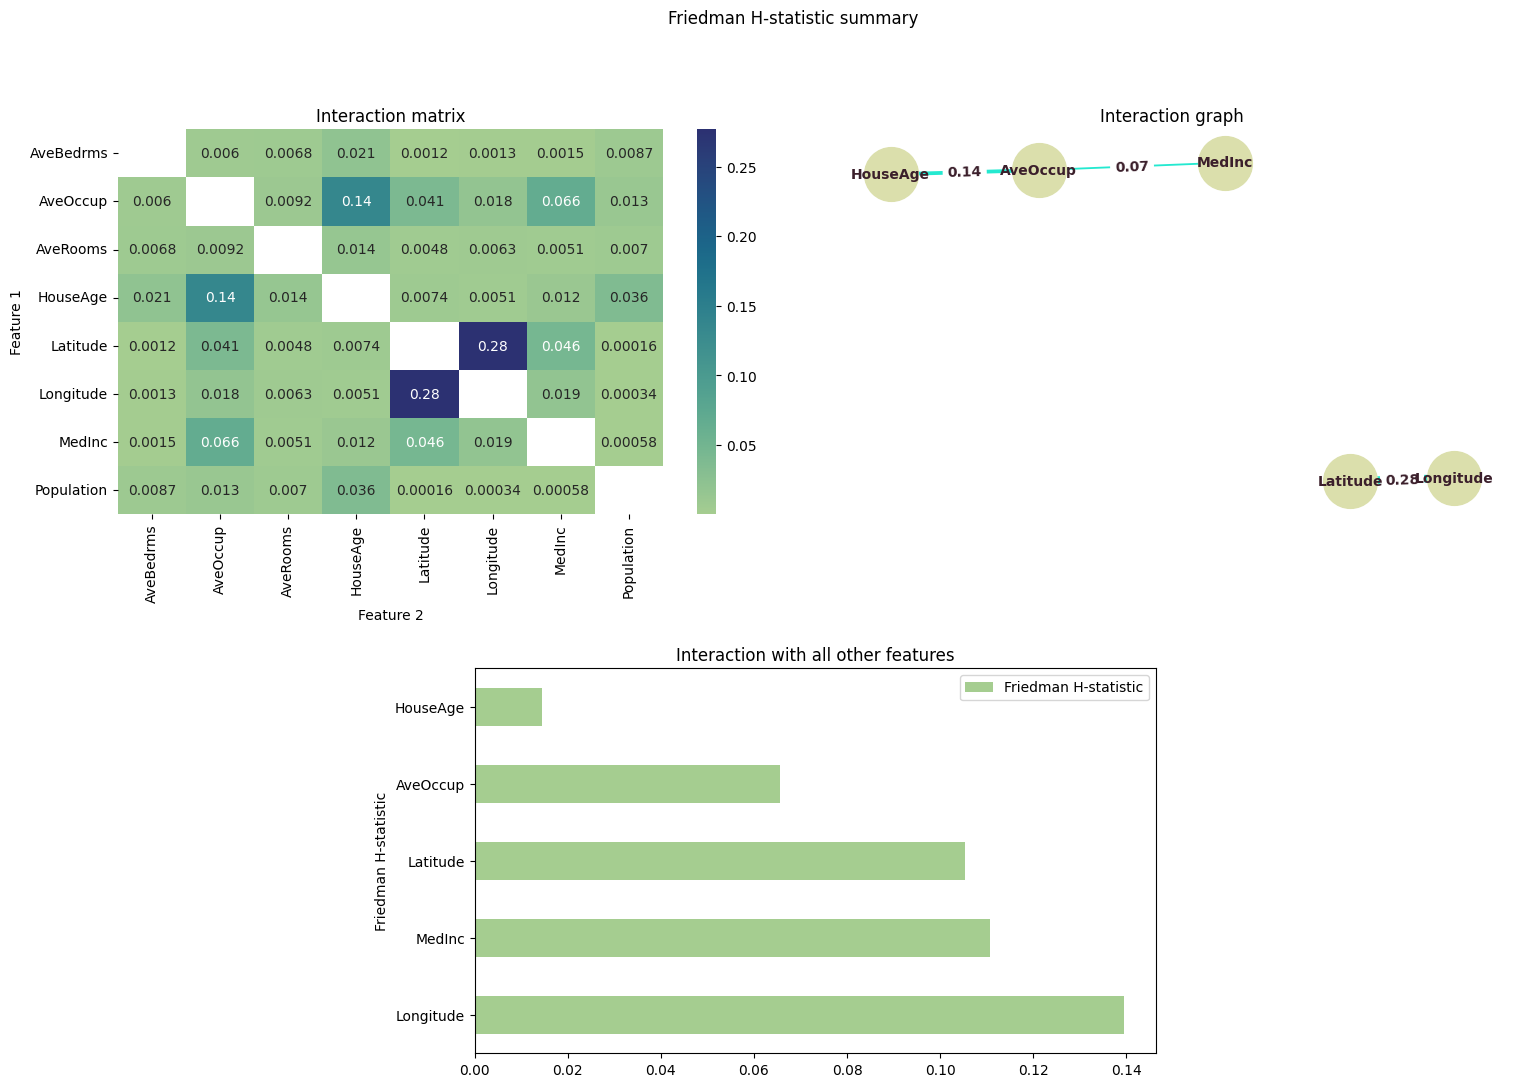

In [10]:
h_stat.plot()  # summary - FriedmanHStatistic

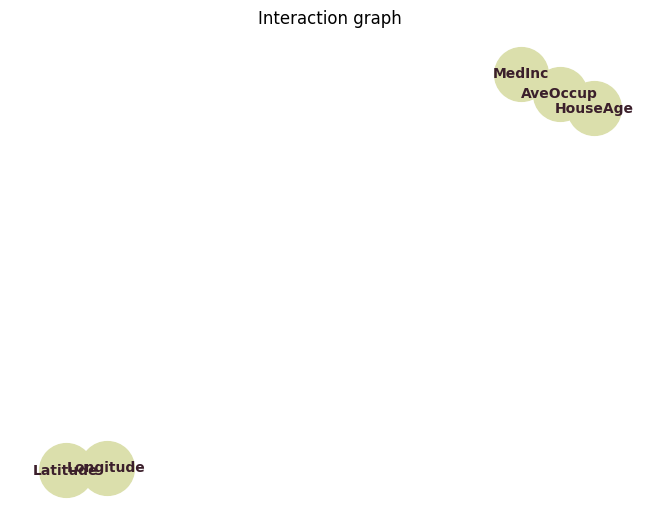

In [11]:
h_stat.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - FriedmanHStatistic

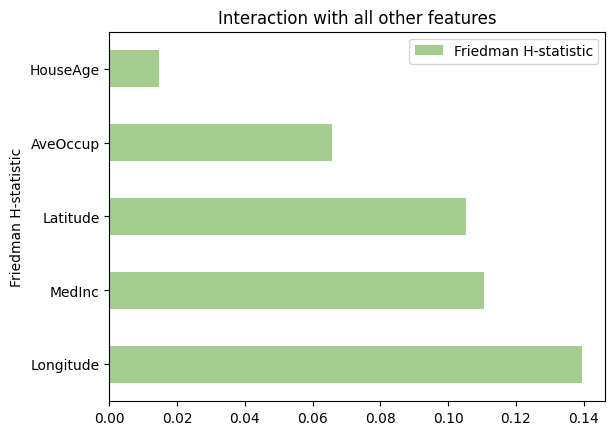

In [12]:
h_stat.plot(VisualisationType.BAR_CHART)  # bar chart - FriedmanHStatistic

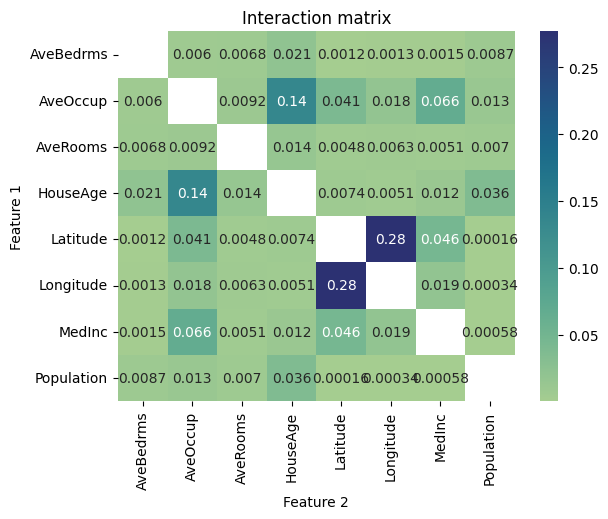

In [13]:
h_stat.plot(VisualisationType.HEATMAP)  # heatmap - FriedmanHStatistic

In [14]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all profile: 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


In [15]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 50, show_progress=True)  # all features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


In [16]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,AveBedrms,Population,-0.019581
1,AveRooms,AveBedrms,-0.020944
2,AveRooms,Population,-0.031442
3,MedInc,Population,-0.036395
4,AveRooms,Longitude,-0.038306
5,MedInc,AveRooms,-0.046701
6,HouseAge,Population,-0.049357
7,AveRooms,AveOccup,-0.058172
8,HouseAge,AveRooms,-0.059317
9,HouseAge,AveBedrms,-0.064227


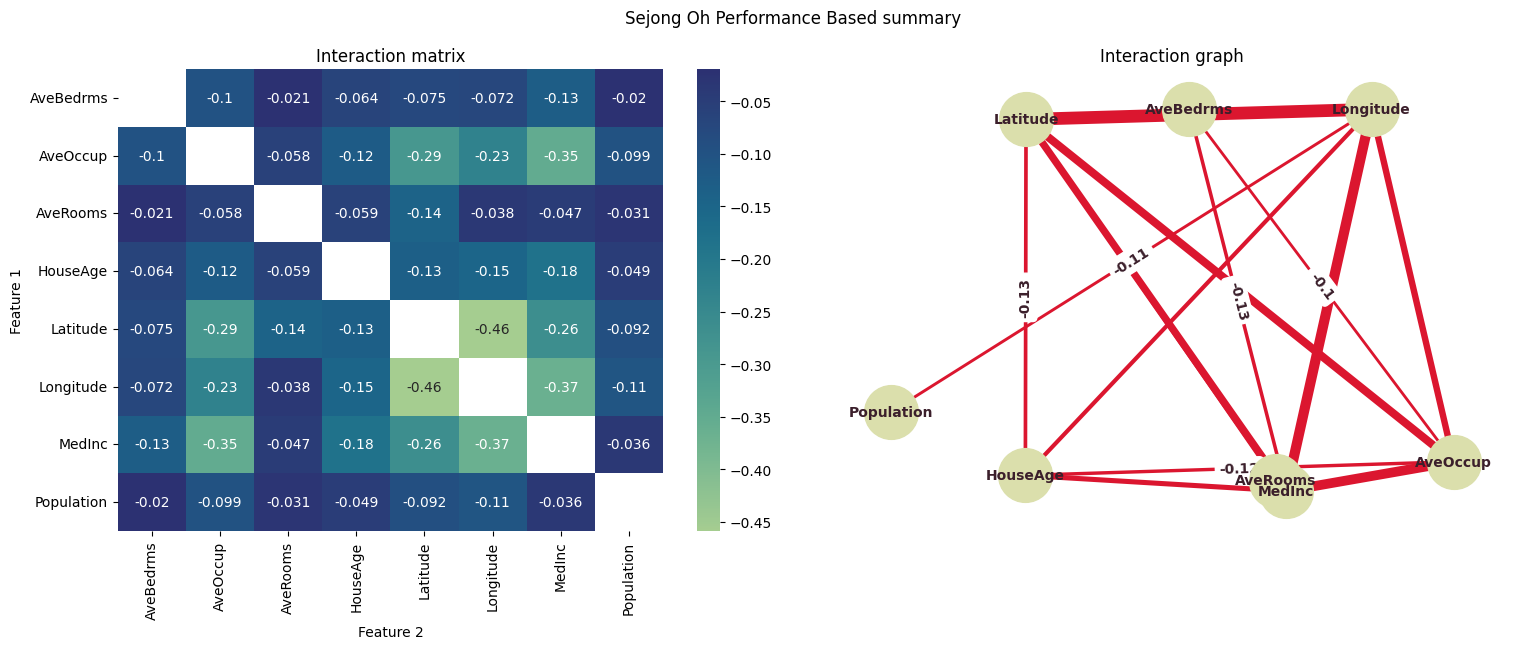

In [17]:
perf_based.plot()  # summary - SejongOhInteraction

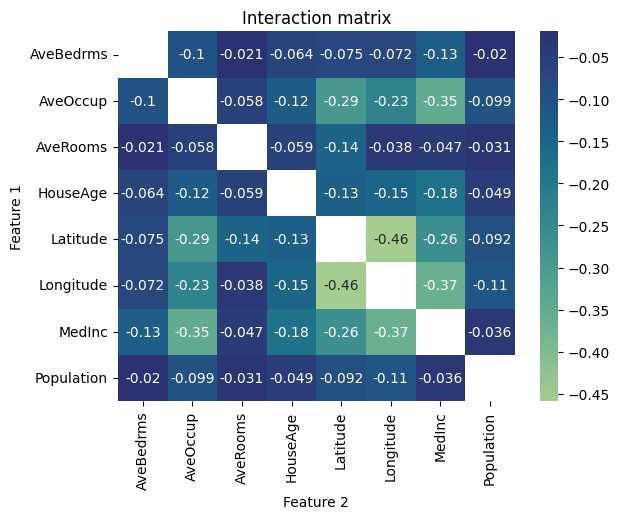

In [18]:
perf_based.plot(VisualisationType.HEATMAP)  # heatmap - SejongOhInteraction

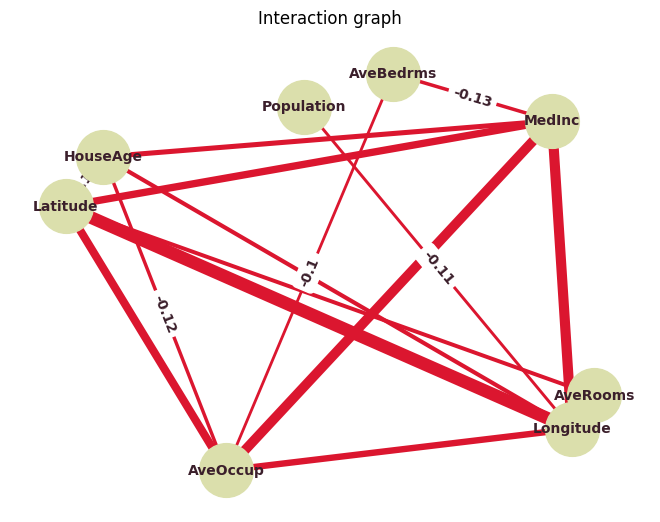

In [19]:
perf_based.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - SejongOhInteraction

In [20]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


In [21]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,Latitude,HouseAge,-0.163307
1,Longitude,HouseAge,-0.170127
2,Latitude,Longitude,-0.547084


In [22]:
h_stat.variable_importance

,Feature,Partial dependence based
0,MedInc,0.703115
1,Latitude,0.424689
2,AveOccup,0.311005
3,AveRooms,0.076590
4,HouseAge,0.044187
5,AveBedrms,0.042533
6,Population,0.010703


In [23]:
vint.variable_importance

,Feature,Partial dependence based
0,Longitude,0.399419
1,Latitude,0.390859
2,AveOccup,0.278005
3,MedInc,0.220817
4,Population,0.038745
5,AveRooms,0.024049
6,AveBedrms,0.022345
7,HouseAge,0.021184


In [33]:
perf_based.variable_importance[perf_based.variable_importance["Feature"] =="Latitude"]["Permutation importance"].values[0]

0.7077719608443547